In [36]:
!pip install opencv-python==4.5.4.60
!pip install opencv-contrib-python==4.5.4.60

In [37]:
from google.colab import files
from io import BytesIO
from PIL import Image

uploaded = files.upload()
im = Image.open(BytesIO(uploaded['tajmahal.jpg']))

Saving tajmahal.jpg to tajmahal (1).jpg


(535, 800, 3)


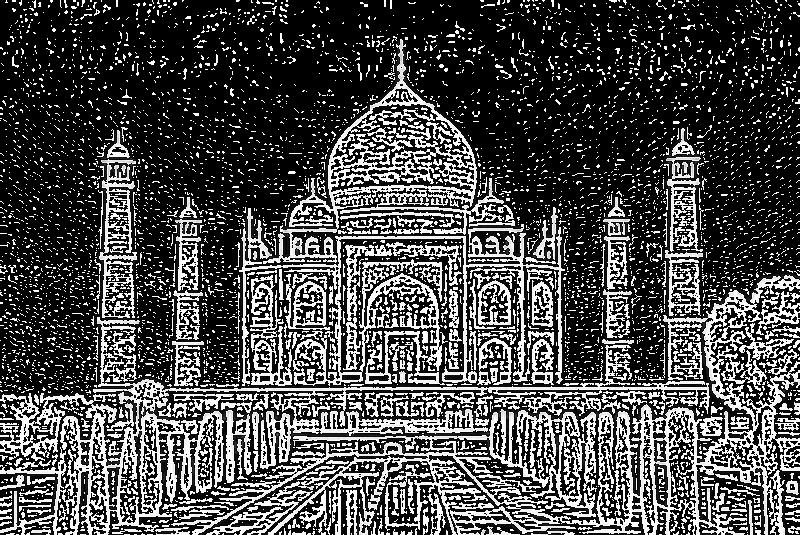

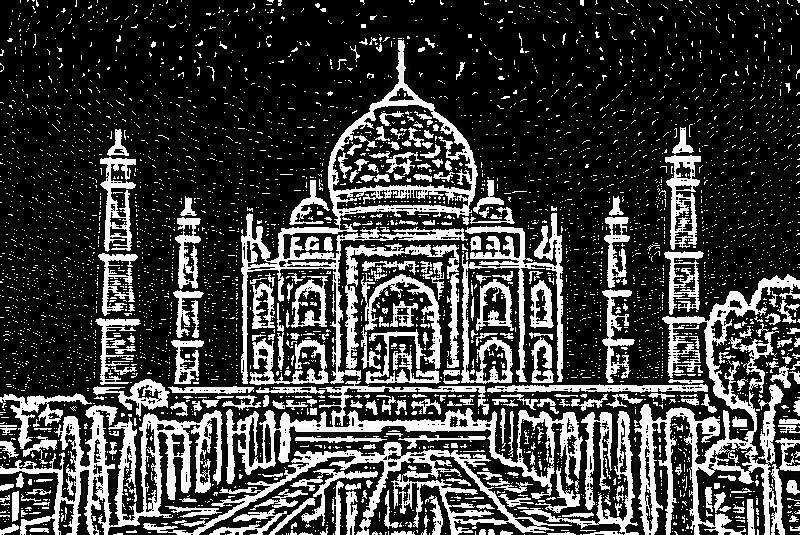

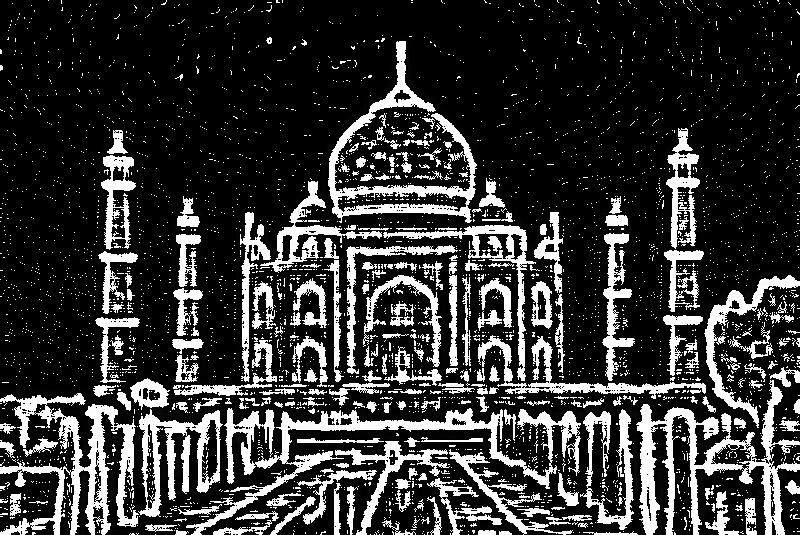

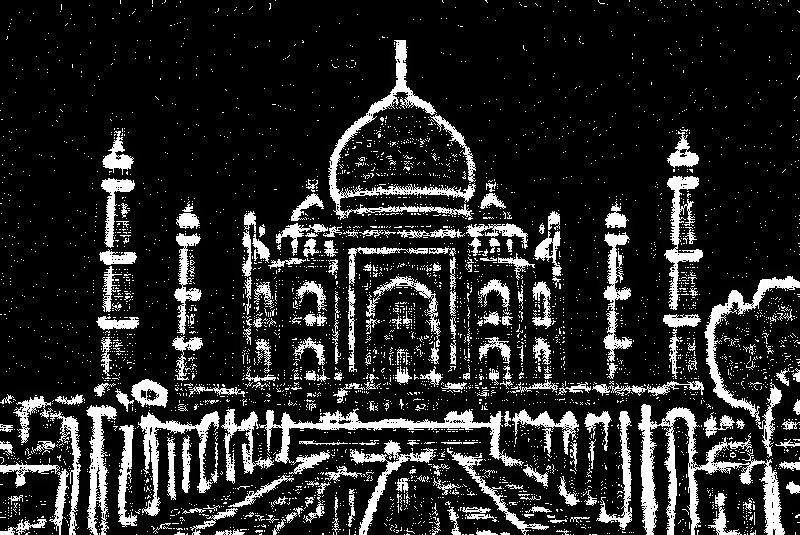

In [41]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

img = cv2.imread('tajmahal.jpg')
print(img.shape)
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
kp, descriptor = sift.detectAndCompute(gray,None)

#Difference of Gaussians:
imgBlur = cv2.GaussianBlur(gray, (3,3), cv2.BORDER_DEFAULT)
imgBlur2 = cv2.GaussianBlur(gray, (7,7), cv2.BORDER_DEFAULT)
imgBlur3 = cv2.GaussianBlur(gray, (11,11), cv2.BORDER_DEFAULT)
imgBlur4 = cv2.GaussianBlur(gray, (15,15), cv2.BORDER_DEFAULT)
imgBlur5 = cv2.GaussianBlur(gray, (19,19), cv2.BORDER_DEFAULT)

DoG = imgBlur - imgBlur2
cv2_imshow(DoG)

DoG2 = imgBlur2 - imgBlur3
cv2_imshow(DoG2)

DoG3 = imgBlur3 - imgBlur4
cv2_imshow(DoG3)

DoG4 = imgBlur4 - imgBlur5
cv2_imshow(DoG4)

gaussian_images = [imgBlur, imgBlur2, imgBlur3, imgBlur4, imgBlur5]
dog_images = [DoG, DoG2, DoG3, DoG4]

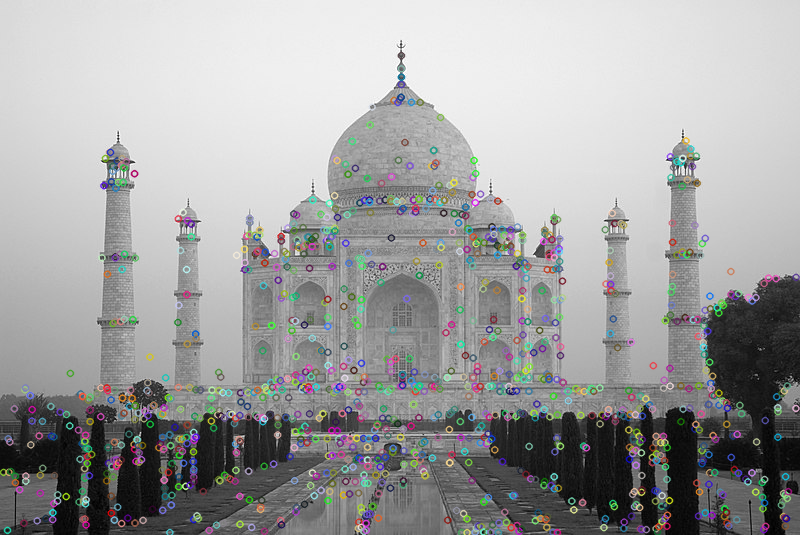

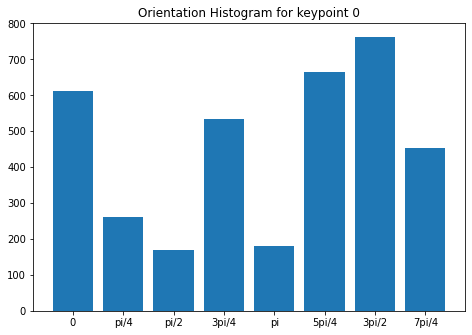

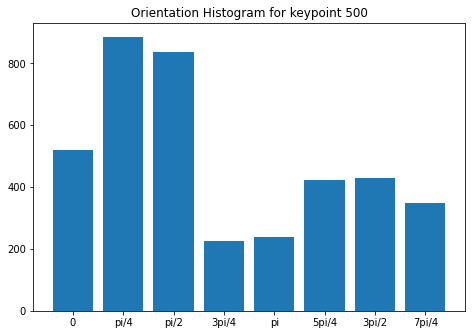

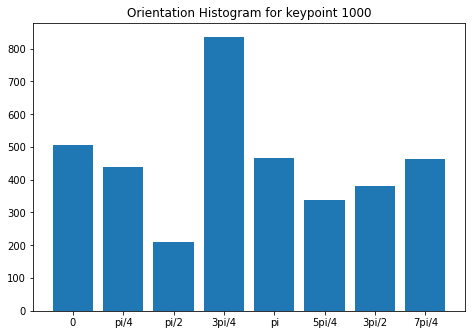

In [65]:
#Local Maxima and Local Minima:

#finds local maxima by iterating through image and adding any points that are 
# less than or equal to threshold
def findMaxima(firstdog,seconddog,dog,y,x):
  values = []
  for i in range(-1,2):
    for j in range(-1,2):
      values.append(firstdog[y+i][x+j])
      values.append(seconddog[y+i][x+j])
      if not ((j==0) and (i==0)):
        values.append(dog[y+i][x+j])
  for i in values:
    if dog[y][x] <= i:
      return 0
  return 1

#finds local minima by iterating through image and adding any points that are 
# greater than or equal to threshold
def findMinima(firstdog,seconddog,dog,y,x):
  values = []
  for i in range(-1,2):
    for j in range(-1,2):
      values.append(firstdog[y+i][x+j])
      values.append(seconddog[y+i][x+j])
      if not ((j==0) and (i==0)):
        values.append(dog[y+i][x+j])
  for i in values:
    if dog[y][x] >= i:
      return 0
  return 1

sift = cv2.xfeatures2d.SIFT_create()
kp, descriptor = sift.detectAndCompute(gray,None)
img=cv2.drawKeypoints(gray,kp,img)
cv2.imwrite('sift_keypoints.jpg',img)
cv2_imshow(img)
mags = []
oris = []
orientation_ = 0
mags = np.zeros(DoG.shape)
oris = np.zeros(DoG.shape)
#to get magnitude and direction:
for i in range(1, 100):
  for j in range(1, 100):    
    orientation_ = math.floor(orientation_/10)
    mags[i][j] = magnitude
    oris[i][j] = orientation_

# Orientation histograms for keypoints 100, 500, and 1000
# Descriptors have size of 128 and 8 possible orientations
# Add together orientation values to extract y axis of histograms
orientation = np.zeros(8)
for i in range(128):
  #We use keypoint number 0
  orientation[i % 8] += descriptor[100][i]

#plot the histogram as a bar graph
fig = plt.figure()
plt.ylim([0,800])
axis = fig.add_axes([0,0,1,1])
angles = ['0', 'pi/4', 'pi/2', '3pi/4', 'pi',  '5pi/4', '3pi/2', '7pi/4']
axis.bar(angles,orientation)
plt.title('Orientation Histogram for keypoint 0')
plt.show()

orientation1 = np.zeros(8)
for i in range(128):
  #We use keypoint number 0
  orientation1[i % 8] += descriptor[500][i]

#plot the histogram as a bar graph
fig1 = plt.figure()
plt.ylim([0,800])
axis = fig1.add_axes([0,0,1,1])
angles = ['0', 'pi/4', 'pi/2', '3pi/4', 'pi',  '5pi/4', '3pi/2', '7pi/4']
axis.bar(angles,orientation1)
plt.title('Orientation Histogram for keypoint 500')
plt.show()

orientation2 = np.zeros(8)
for i in range(128):
  #We use keypoint number 0
  orientation2[i % 8] += descriptor[1000][i]

#plot the histogram as a bar graph
fig2 = plt.figure()
plt.ylim([0,800])
axis = fig2.add_axes([0,0,1,1])
angles = ['0', 'pi/4', 'pi/2', '3pi/4', 'pi',  '5pi/4', '3pi/2', '7pi/4']
axis.bar(angles,orientation2)
plt.title('Orientation Histogram for keypoint 1000')
plt.show()

# Why is SIFT is a reasonable feature descriptor?

SIFT is a reasonable feature descriptor because its features are not affected by the orientation or the size of the image. Features are generally identified by first creating a scale space, then identifying which features/keypoints are suitable, then making sure that all the chosen keypoints are rotation invariant, and finally, assigning some kind of unique descriptor to each keypoint. Also, SIFT features are local, which means that they are robust to things like clutter and noise. SIFT is also quite efficient and could be extended to many different features types, making it all the more reasonable as a feature descriptor.

# What types of points become key points in the SIFT approach?

To choose keypoints with the SIFT approach, first, the scale space is constructed. By blurring an image using Gaussian blur, we can create a Difference of Gaussian, which is the difference between consecutive blurred images. Each of the difference of gaussian images has an enhanced set of features; after the images are created, you now find keypoints from the images. You do this by finding the local minima and maxima for the images. To find the local min/max, you iterate through every single pixel in the image and make a comparison with the pixel's neighboring pixels. By comparing each pixel value with its neighbors, you now have potential keypoints. Now, you just need to get rid of the keypoints that are extremely close to the edge. You can do this by calculating the distance from the image's borders and eliminating points with a distance less than a certain threshold. For even better keypoints, you can also get rid of keypoints with low contrast by using a Taylor expansion.

# What is the difference between features in this approach and features in deep learning networks?

Seeing that deep learning networks are much newer and more powerful than SIFT, they approach features in a different way. SIFT is the original algorithm that was used for feature detection and once keypoints are identified in images, you must match keypoints that correspond to the same point from one image to another. With deep learning approaches, feature extraction is used; existing point correspondences are used to find patterns within images and extract features. Deep learning uses neural networks with multiple layers; each layer is capable of extracting one or more unique features in the image.

# What are the advantages and disadvantages of hand-crafted features vs. learned features?

Hand-crafted features were what was used before the advent of deep learning. For hand-crafted features, you must manually define a set of features and then extract them. Some examples of this are detecting edges, corners, and constructing magnitude/orientation histograms. Because the features are manually defined, there are no guaranteed that the features are actually good descriptors for the images. The advantage of hand-crafted features is that you do not need a large training set. Also, hand-crafted features might be easier to define when the classification tasks are more trivial. The disadvantage of learned features is that we do not have control over what features will be learned by the network. Anothere disadvantage of deep learning as a whole is that very large datasets are required and it is extrememly expensive to train. Redundant features may also be extracted by the network. Ultimately learned features usually are more applicable to the entire dataset while hand-crafted features are better for small dataset with obviously classified images.